Median difference: 0.017


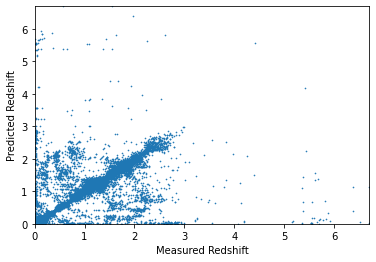

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor


def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets


def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))


def cross_validate_predictions(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  
  all_predictions = np.zeros_like(targets)

  for train_indices, test_indices in kf.split(features):

    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]

    model.fit(train_features, train_targets)
        
    predictions = model.predict(test_features)
        
    all_predictions[test_indices] = predictions


  return all_predictions


if __name__ == "__main__":
  data = np.load('./sdss_galaxy_colors.npy')
  features, targets = get_features_targets(data)


  dtr = DecisionTreeRegressor(max_depth=19)

  predictions = cross_validate_predictions(dtr, features, targets, 10)

 
  diffs = median_diff(predictions, targets)
  print('Median difference: {:.3f}'.format(diffs))

  plt.scatter(targets, predictions, s=0.4)
  plt.xlim((0, targets.max()))
  plt.ylim((0, predictions.max()))
  plt.xlabel('Measured Redshift')
  plt.ylabel('Predicted Redshift')
  plt.show()